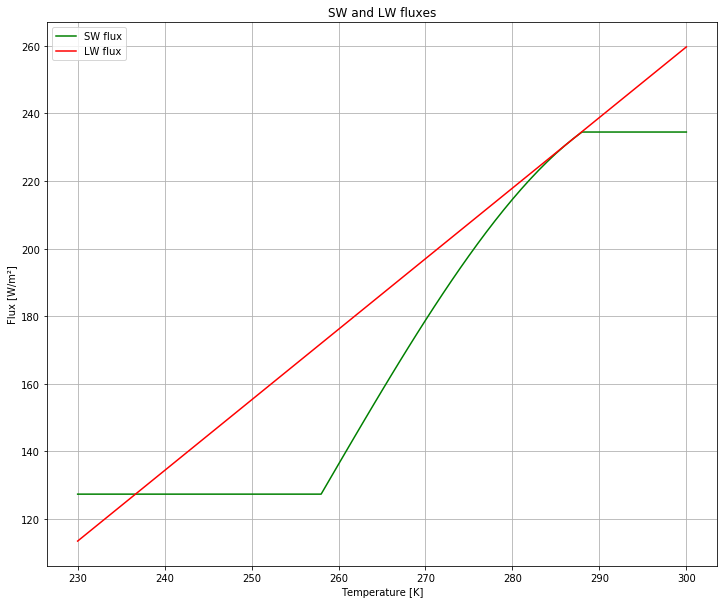

In [62]:
import numpy as np 
import math
import matplotlib.pyplot as plt

import sys
#import os
sys.path.insert(1,'/home/Users/Utente/CC_exercise/EBM')
#sys.path.insert(0,'EBM')
import EBM

#range of temperature
Tsval = np.arange(230,301,1)
#SW and LW fluxes for those temperatures:
S = np.zeros(len(Tsval))
F = np.zeros(len(Tsval))

for idx in np.arange(len(Tsval)):
    S[idx] = EBM.SW_flux(Tsval[idx])
    F[idx] = EBM.LW_flux(Tsval[idx])

fig=plt.figure(figsize=(12,10));ax=fig.add_subplot(111)
plt.plot(Tsval,S,color='g',label='SW flux')
plt.plot(Tsval,F,color='r',label='LW flux')
plt.grid()
plt.title('SW and LW fluxes')
plt.xlabel('Temperature [K]'); plt.ylabel('Flux [W/m²]')
ax.legend()
plt.show()

#find zero crossing 
TsSolution = EBM.find_zero_crossing(S-F,Tsval)

#cerca anche valori di alpha e ice edge?
xsSolution = np.zeros((len(TsSolution)))
alphaSolution = np.zeros((len(TsSolution)))

In [63]:
print('Stable solutions:\nTs_1 = ', TsSolution[0],'[K]\nTs_3 = ',TsSolution[2],'[K]')
print('Unstable solution:\nTs_2 = ', TsSolution[1],'[K]')

Stable solutions:
Ts_1 =  236.6507177033493 [K]
Ts_3 =  287.1232530817658 [K]
Unstable solution:
Ts_2 =  286.3952854807711 [K]


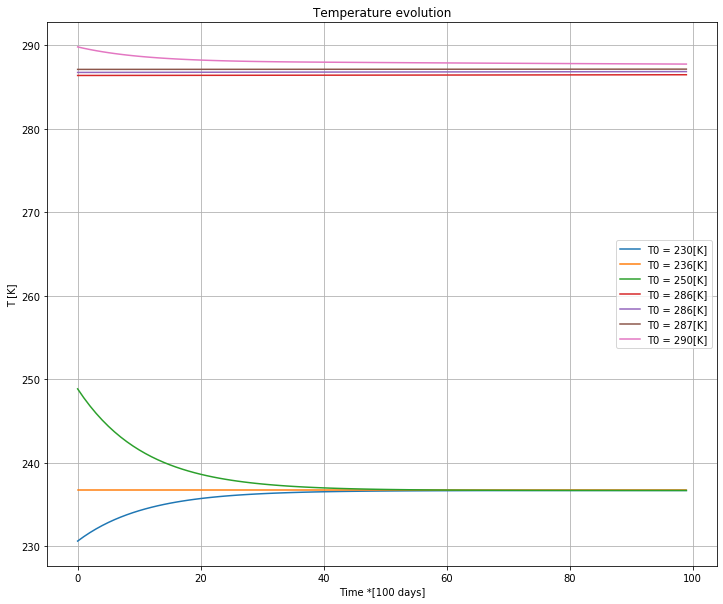

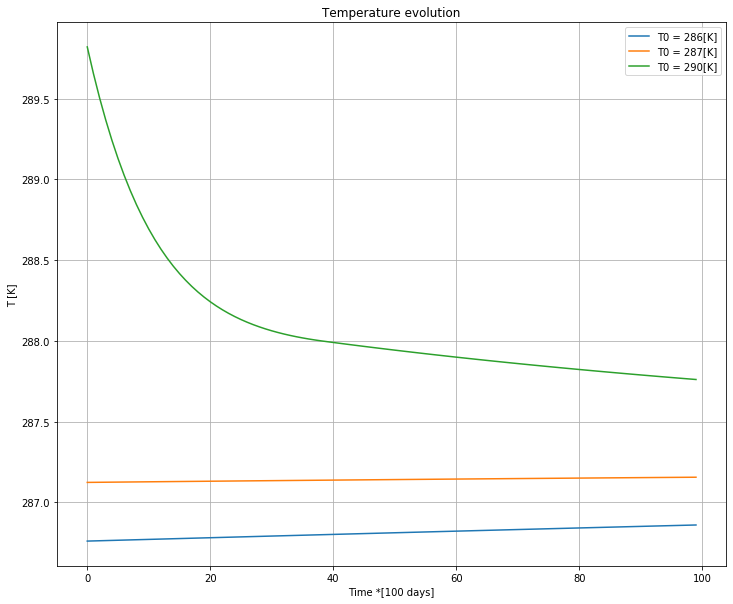

In [64]:
#Part 2
nt = 100 #number of steps. Every step is about 100 days. 
#I'll try differnet values for the inital T, ranging between [230-300]K
T = [230,TsSolution[0],250,TsSolution[1],TsSolution[1]+(TsSolution[2]-TsSolution[1])/2, TsSolution[2], 290]
time = np.arange(0,100,1)

TsSerie = np.zeros((7,nt))  #matrix for temperature series
for idx, Ti in enumerate(T): #for each initial temp
    TsSerie[idx,:] = EBM.runEBM0d(Ti,nt)

labels = ["T0 = %d[K]" % T[i]  for i in range(len(T))]
fig=plt.figure(figsize=(12,10));ax=fig.add_subplot(111)
for i in range(len(T)):
    plt.plot(time,TsSerie[i,:],label=labels[i])
plt.grid()
plt.title('Temperature evolution')
plt.xlabel('Time *[100 days]'); plt.ylabel('T [K]')
ax.legend()
plt.show()

#To make it more clear, I plot also only the last 3 series for better observe the time evolution 
T1 = T[4:]
TsSerie1=TsSerie[4:,:]
labels1 = ["T0 = %d[K]" % T1[i]  for i in range(len(T1))]
fig1=plt.figure(figsize=(12,10));ax=fig1.add_subplot(111)
for i in range(len(T1)):
    plt.plot(time,TsSerie1[i,:],label=labels1[i])
plt.grid()
plt.title('Temperature evolution')
plt.xlabel('Time *[100 days]'); plt.ylabel('T [K]')
ax.legend()
plt.show()

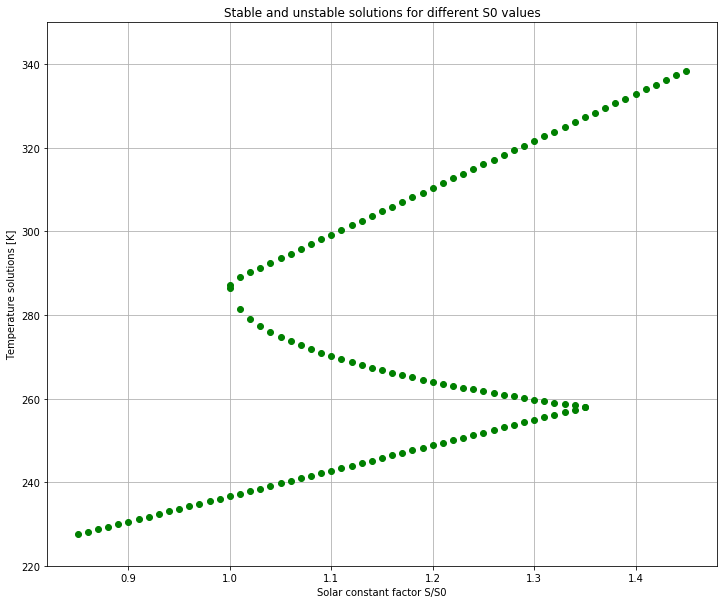

In [69]:
#part 3
#devo calcolare come cambiano le soluzioni
#di equilibrio al variare di S0
#posso calcolare tutte le sol Ts(0,1,2)

factor = np.arange(0.85,1.46,0.01)
#print(factor)
#range of temperature
Tsval = np.arange(-273,400,1)

S = np.zeros((len(factor),len(Tsval)))
F = np.zeros(len(Tsval))

for idx in np.arange(len(Tsval)):  #for all T
    for i in np.arange(len(factor)): #for all S0
        S[i,idx] = EBM.SW_flux(Tsval[idx])*factor[i]
    F[idx] = EBM.LW_flux(Tsval[idx])
S = S.T


#find zero crossing 
#for i in np.arange(len(factor)):
TsSolutions = np.zeros((len(factor),3))
for i in range(len(factor)):
    Sol = EBM.find_zero_crossing(S[:,i]-F,Tsval)
    
    if len(Sol)==3:  #if I have 3 solutions
        TsSolutions[i,0] = Sol[0]
        TsSolutions[i,1] = Sol[1]
        TsSolutions[i,2] = Sol[2]
    else:            #if I have only one solution I set the other values to zero
        TsSolutions[i,0] = Sol
        TsSolutions[i,1] = 0
        TsSolutions[i,2] = 0

fig3=plt.figure(figsize=(12,10));ax=fig3.add_subplot(111)
for i in range(3):
    plt.plot(factor, TsSolutions[:,i], 'go')
plt.grid()
plt.title('Stable and unstable solutions for different S0 values')
plt.xlabel('Solar constant factor S/S0'); plt.ylabel('Temperature solutions [K]')
plt.ylim([220, 350])
plt.show()